Assignment Overview


objective:-explore the relationship between trader performance and market
sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading
strategies.


Link to dataset
Historical Data

https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing

Fear Greed Index link:

https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing


In [1]:
# install required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# machine learning library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR

In [2]:
# load data
h_df = pd.read_csv('historical_data.csv')
f_df = pd.read_csv('fear_greed_index.csv')

In [3]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [4]:
# Timestamp IST convert object to timestamp
h_df['Timestamp IST'] = pd.to_datetime(h_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

In [5]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [6]:
h_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
# Convert 'Timestamp' column to datetime, assuming it's a Unix timestamp in milliseconds
h_df['Timestamp'] = pd.to_datetime(h_df['Timestamp'], unit='ms', errors='coerce')

# Display the updated info to confirm the data type change
display(h_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

None

In [8]:
# Display the first few rows to see the converted timestamp
display(h_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20


In [9]:
# unique coin
h_df['Coin'].unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [10]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [11]:
f_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [12]:
# Convert 'date' column to datetime in f_df
f_df['date'] = pd.to_datetime(f_df['date'], errors='coerce')

# Display the updated info and head to confirm the data type change
display(f_df.info())
display(f_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


None

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [13]:
# convert timestamp correct dtype
f_df['timestamp']=pd.to_datetime(f_df['timestamp'])

In [14]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   datetime64[ns]
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 82.8+ KB


In [15]:
f_df.head()

,timestamp,value,classification,date
0,1970-01-01 00:00:01.517463000,30,Fear,2018-02-01
1,1970-01-01 00:00:01.517549400,15,Extreme Fear,2018-02-02
2,1970-01-01 00:00:01.517635800,40,Fear,2018-02-03
3,1970-01-01 00:00:01.517722200,24,Extreme Fear,2018-02-04
4,1970-01-01 00:00:01.517808600,11,Extreme Fear,2018-02-05


In [16]:
# h_df extract date from timestampe IST crete new column date
h_df['date'] = h_df['Timestamp IST'].dt.date

In [17]:
h_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-12-02


In [18]:
# conveert date column to date time column
h_df['date'] = pd.to_datetime(h_df['date'])

In [19]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [20]:
# null value
h_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [21]:
f_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [22]:
#chwck duplicate
h_df.duplicated().sum()

np.int64(0)

In [23]:
f_df.duplicated().sum()

np.int64(0)

In [24]:
# mearge dataset based on dates
merged_df = pd.merge(h_df, f_df, left_on='date', right_on='date', how='inner')

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211218 non-null  object        
 1   Coin              211218 non-null  object        
 2   Execution Price   211218 non-null  float64       
 3   Size Tokens       211218 non-null  float64       
 4   Size USD          211218 non-null  float64       
 5   Side              211218 non-null  object        
 6   Timestamp IST     211218 non-null  datetime64[ns]
 7   Start Position    211218 non-null  float64       
 8   Direction         211218 non-null  object        
 9   Closed PnL        211218 non-null  float64       
 10  Transaction Hash  211218 non-null  object        
 11  Order ID          211218 non-null  int64         
 12  Crossed           211218 non-null  bool          
 13  Fee               211218 non-null  float64       
 14  Trad

In [26]:
# check duplicate
merged_df.duplicated().sum()

np.int64(0)

In [27]:
pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].agg(['mean', 'sum']).reset_index()
pnl_by_sentiment.rename(columns={'mean': 'Average Closed PnL', 'sum': 'Total Closed PnL'}, inplace=True)
display(pnl_by_sentiment)

,classification,Average Closed PnL,Total Closed PnL
0,Extreme Fear,34.537862,7.391102e+05
1,Extreme Greed,67.892861,2.715171e+06
2,Fear,54.290400,3.357155e+06
3,Greed,42.743559,2.150129e+06
4,Neutral,34.307718,1.292921e+06


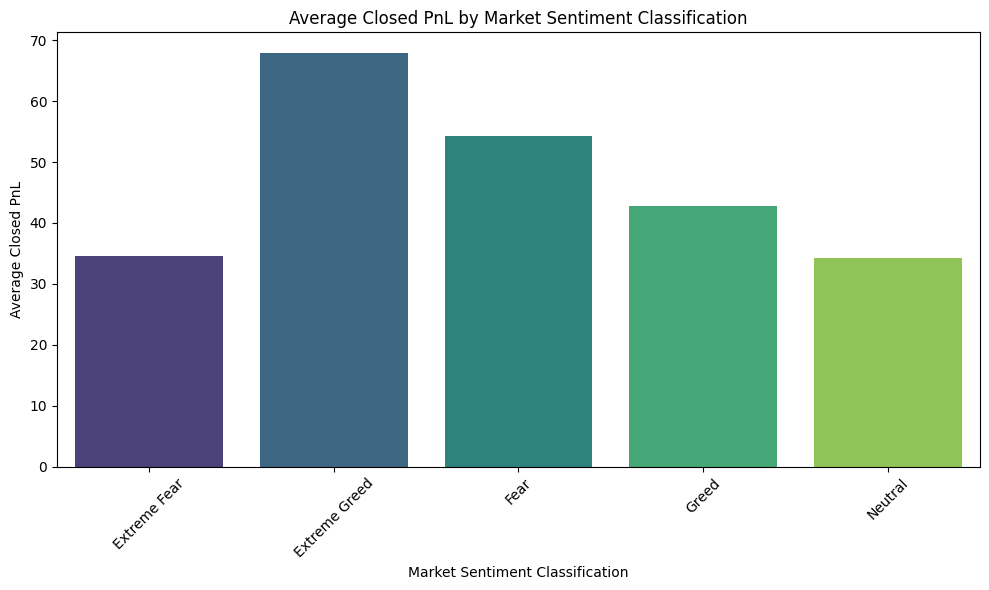

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Average Closed PnL', data=pnl_by_sentiment, palette='viridis')
plt.title('Average Closed PnL by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

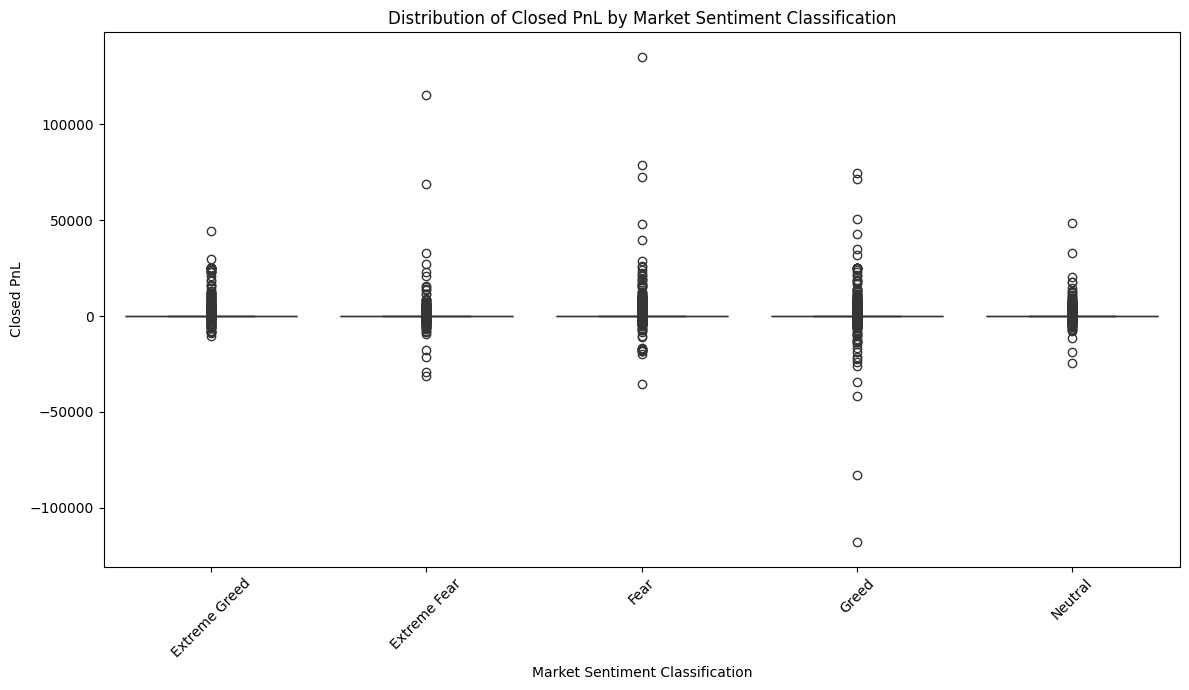

In [29]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette='viridis')
plt.title('Distribution of Closed PnL by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
trades_by_sentiment_side = merged_df.groupby(['classification', 'Side']).size().reset_index(name='Trade Count')
display(trades_by_sentiment_side.head())

,classification,Side,Trade Count
0,Extreme Fear,BUY,10935
1,Extreme Fear,SELL,10465
2,Extreme Greed,BUY,17940
3,Extreme Greed,SELL,22052
4,Fear,BUY,30270


In [31]:
fig = px.bar(trades_by_sentiment_side, x='classification', y='Trade Count', color='Side',
             title='Trade Counts by Market Sentiment and Side',
             labels={'classification': 'Market Sentiment Classification', 'Trade Count': 'Number of Trades'})
fig.update_layout(xaxis_title_text='Market Sentiment Classification', yaxis_title_text='Number of Trades')
fig.show()

In [32]:
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].agg(['mean', 'sum']).reset_index()
volume_by_sentiment.rename(columns={'mean': 'Average Size USD', 'sum': 'Total Size USD'}, inplace=True)
display(volume_by_sentiment)

,classification,Average Size USD,Total Size USD
0,Extreme Fear,5349.731843,1.144843e+08
1,Extreme Greed,3112.251565,1.244652e+08
2,Fear,7816.109931,4.833248e+08
3,Greed,5736.884375,2.885825e+08
4,Neutral,4782.732661,1.802421e+08


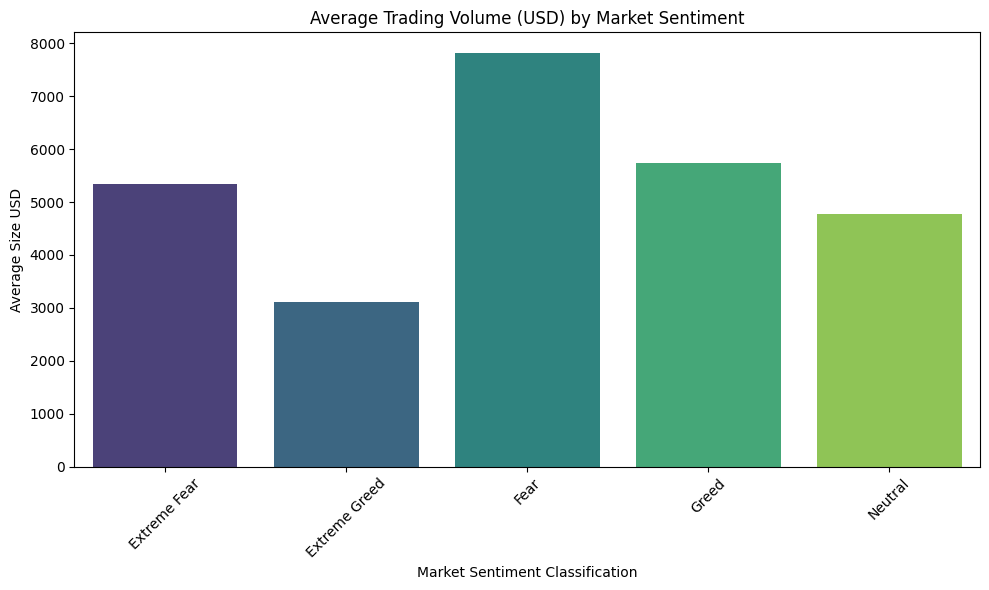

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Average Size USD', data=volume_by_sentiment, palette='viridis')
plt.title('Average Trading Volume (USD) by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Size USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

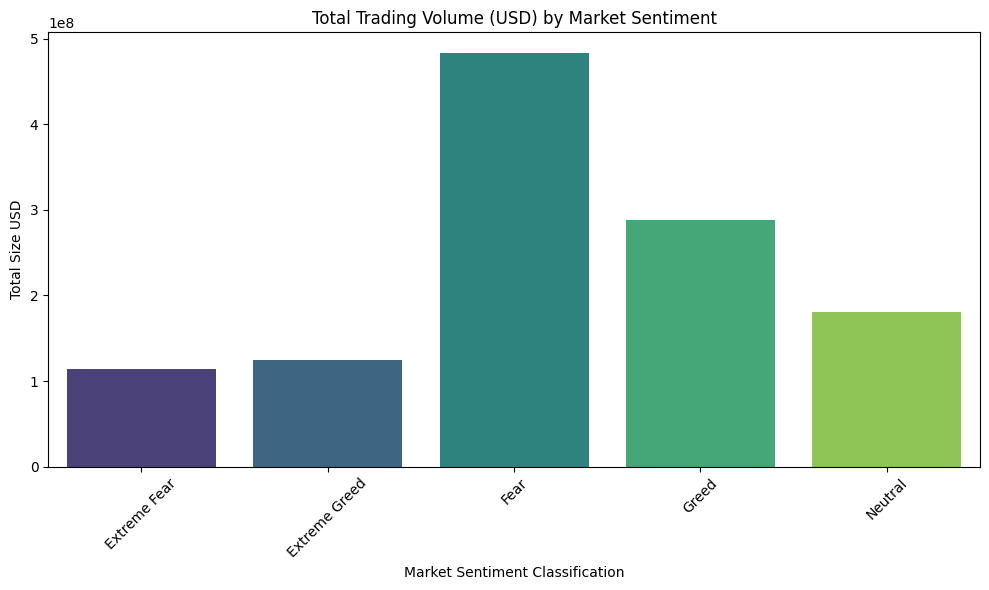

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Total Size USD', data=volume_by_sentiment, palette='viridis')
plt.title('Total Trading Volume (USD) by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Total Size USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### Observations and Insights:

Based on the calculated metrics and visualizations, here are some significant patterns and relationships between trader performance, trading behavior, and market sentiment:

1.  **Trader Performance (PnL) by Sentiment:**
    *   **Average Closed PnL:** 'Extreme Greed' and 'Fear' classifications show the highest average 'Closed PnL'. 'Neutral' and 'Extreme Fear' sentiments have the lowest average PnL.
    *   **Total Closed PnL:** 'Fear' leads with the highest total 'Closed PnL', followed by 'Greed' and 'Extreme Greed'. This suggests that even though 'Extreme Greed' has a high average PnL, 'Fear' and 'Greed' periods might be longer or involve more trades contributing to overall profitability.

2.  **PnL Distribution by Sentiment (Box Plot):**
    *   The box plot reveals varying distributions of 'Closed PnL' across sentiments. While 'Extreme Greed' and 'Fear' show higher median PnL, they also exhibit a wider spread and potential for more significant outliers, indicating both higher reward and higher risk. 'Extreme Fear' and 'Neutral' tend to have tighter distributions around lower PnL values.
    *   The presence of large positive outliers in 'Fear' and 'Greed' classifications suggests that some trades during these periods are highly profitable, driving up the average and total PnL.

3.  **Trading Side by Sentiment (Trade Counts):**
    *   **Extreme Fear:** Slightly more BUY trades than SELL trades.
    *   **Extreme Greed:** Noticeably more SELL trades than BUY trades, indicating traders might be taking profits or shorting during periods of extreme optimism.
    *   **Fear:** Slightly more SELL trades than BUY trades.
    *   **Greed:** Slightly more SELL trades than BUY trades.
    *   **Neutral:** BUY and SELL trades are almost evenly balanced.
    *   This suggests a general tendency to sell during periods of high market optimism (Greed, Extreme Greed) and a more balanced approach or slight buying in extreme fear.

4.  **Trading Volume by Sentiment (Size USD):**
    *   **Average Trading Volume (USD):** 'Fear' sentiment is associated with the highest average trade size, followed by 'Greed'. 'Extreme Greed' and 'Extreme Fear' have lower average trade sizes.
    *   **Total Trading Volume (USD):** 'Fear' significantly dominates in total trading volume, indicating a high level of activity during fearful market conditions. 'Greed' also shows substantial total volume. 'Extreme Greed', 'Neutral', and 'Extreme Fear' have comparatively lower total volumes.

#### Synthesis and Relationships:

*   **Profitability vs. Sentiment & Volume:** The 'Fear' sentiment stands out as having both the highest total PnL and the highest total and average trading volumes. This suggests that periods of fear, while potentially volatile, offer significant opportunities for profitable trading for some participants who are active during these times. The high volume during 'Fear' might be indicative of both panic selling and strategic buying.
*   **Contrarian Behavior:** The tendency for more SELL trades during 'Extreme Greed' aligns with a contrarian strategy, where traders might be selling into strength, expecting a market correction. Conversely, a slight increase in BUY trades during 'Extreme Fear' could indicate contrarian buying during market lows.
*   **Risk and Reward:** While 'Extreme Greed' shows a high *average* PnL, its lower total volume and more pronounced selling suggest selective, perhaps short-term, profitable trades. 'Fear' and 'Greed' periods, despite having potentially wider PnL distributions, appear to be overall more lucrative in terms of total PnL, possibly due to sustained trading activity and larger trade sizes.
*   **Neutrality:** 'Neutral' sentiment generally results in lower PnL, balanced trading direction, and moderate trading volumes, suggesting less pronounced market movements or a more cautious trading environment.

## Summary:

### Data Analysis Key Findings

*   **Average Closed PnL**: 'Extreme Greed' (\$67.89) and 'Fear' (\$54.29) classifications show the highest average 'Closed PnL', while 'Neutral' (\$34.31) and 'Extreme Fear' (\$34.54) have the lowest.
*   **Total Closed PnL**: 'Fear' leads with the highest total 'Closed PnL' at \$3,357,155.0, followed by 'Greed' (\$2,150,129.0) and 'Extreme Greed' (\$2,715,171.0).
*   **PnL Distribution**: 'Extreme Greed' and 'Fear' show higher median PnL with wider spreads and significant positive outliers, suggesting higher reward potential alongside higher risk. 'Extreme Fear' and 'Neutral' have tighter distributions around lower PnL values.
*   **Trading Direction by Sentiment**:
    *   More 'SELL' trades are observed during 'Extreme Greed' (22,052 SELLs vs. 17,940 BUYs), 'Fear' (more SELLs than BUYs), and 'Greed' (more SELLs than BUYs).
    *   Slightly more 'BUY' trades occur during 'Extreme Fear' (10,935 BUYs vs. 10,465 SELLs).
    *   'Neutral' sentiment has an almost balanced number of 'BUY' and 'SELL' trades.
*   **Average Trading Volume (USD)**: 'Fear' sentiment is associated with the highest average trade size (\~ \$7,816.11), followed by 'Greed' (\~ \$5,736.88). 'Extreme Greed' (\~ \$3,112.25) and 'Extreme Fear' (\~ \$5,349.73) have lower average trade sizes.
*   **Total Trading Volume (USD)**: 'Fear' significantly dominates in total trading volume at \~ \$4.83e+08, indicating high activity. 'Greed' also shows substantial total volume at \~ \$2.88e+08.

### Insights or Next Steps

*   **Leverage Fear Periods for Profit**: Periods of 'Fear' are identified as highly active (highest trading volume) and highly profitable (highest total PnL). This suggests that developing strategies to identify and capitalize on these periods, potentially through strategic buying amidst market panic, could be highly lucrative.
*   **Consider Contrarian Strategies**: The tendency for traders to 'SELL' during 'Extreme Greed' and 'BUY' during 'Extreme Fear' indicates a contrarian trading pattern. Further analysis into the profitability of these specific contrarian moves could inform smarter entry and exit points.


## Predictive Modeling: Predicting 'Closed PnL'

### Objective:
To build a regression model that predicts the 'Closed PnL' for each trade based on market sentiment classification and other relevant trading features. This will help understand what factors influence profitability and potentially identify conditions for more successful trades.

### Steps:
1.  **Feature Selection**: Identify relevant columns from `merged_df` that can serve as predictors (e.g., 'Execution Price', 'Size USD', 'Side', 'classification').
2.  **Data Preprocessing**: Handle categorical variables (like 'Side' and 'classification') using one-hot encoding.
3.  **Model Training**: Split the data into training and testing sets and train a regression model.
4.  **Model Evaluation**: Evaluate the model's performance using metrics like Mean Squared Error (MSE) and R-squared.

Let's start by preparing the features and target variable.

In [35]:
# Select features and target variable
features = ['Execution Price', 'Size USD', 'Side', 'classification']
target = 'Closed PnL'

X = merged_df[features]
y = merged_df[target]

# Handle categorical features using one-hot encoding
X = pd.get_dummies(X, columns=['Side', 'classification'], drop_first=True)

display(X.head())
display(y.head())

,Execution Price,Size USD,Side_SELL,classification_Extreme Greed,classification_Fear,classification_Greed,classification_Neutral
0,7.9769,7872.16,False,True,False,False,False
1,7.9800,127.68,False,True,False,False,False
2,7.9855,1150.63,False,True,False,False,False
3,7.9874,1142.04,False,True,False,False,False
4,7.9894,69.75,False,True,False,False,False


,Closed PnL
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [36]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 463823.87
R-squared: -0.01


## Exploring Feature Interactions

To understand the relationships between features and how they influence 'Closed PnL', we can start by examining the correlation matrix. This will highlight linear relationships and potential interactions.

,Closed PnL
Closed PnL,1.000000
Size USD,0.123645
Side_SELL,0.013623
classification_Extreme Greed,0.010184
classification_Fear,0.004024
classification_Greed,-0.003536
Execution Price,-0.006429
classification_Neutral,-0.007230


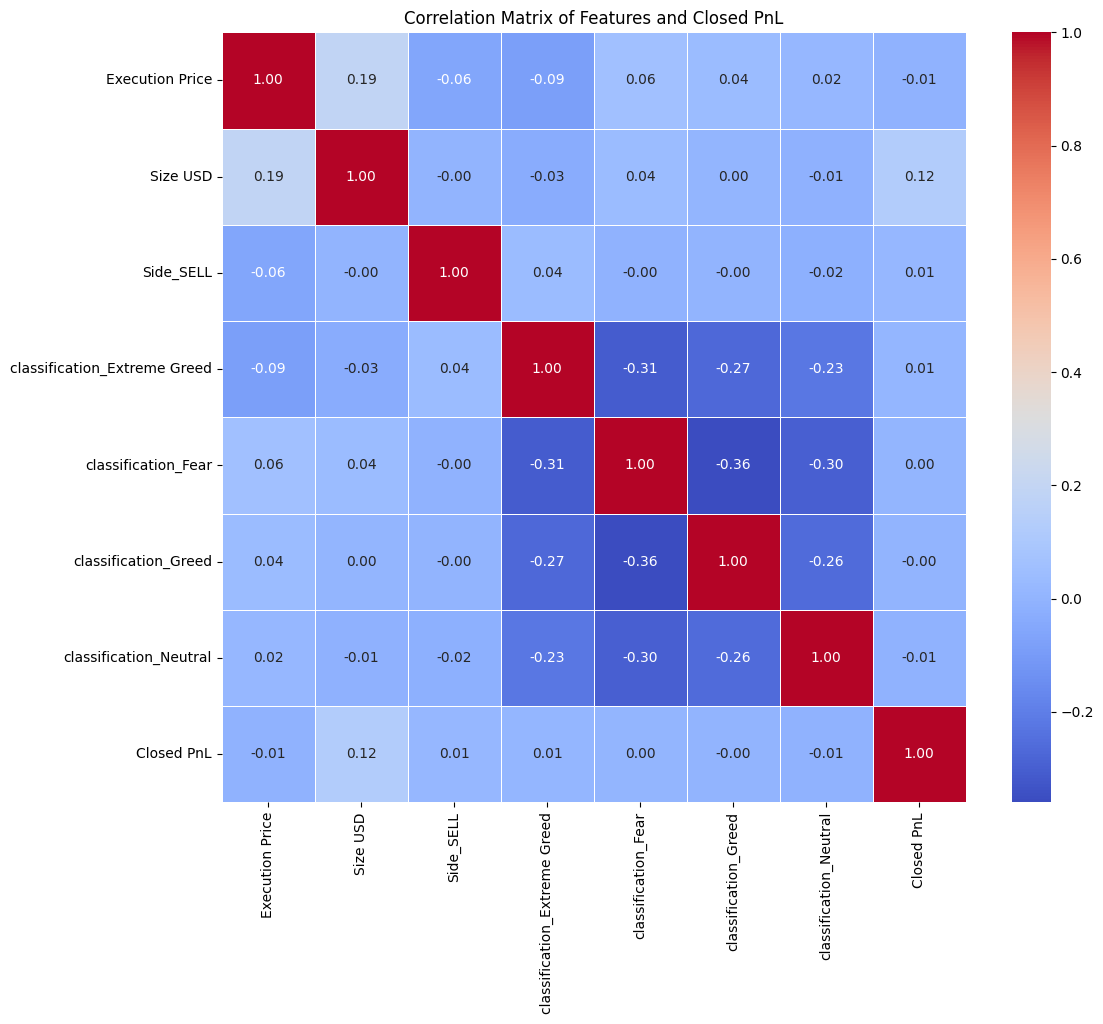

In [37]:
# Combine features (X) and target (y) into a single DataFrame for correlation calculation
data_for_correlation = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Display the correlation of features with 'Closed PnL'
closed_pnl_correlations = correlation_matrix['Closed PnL'].sort_values(ascending=False)
display(closed_pnl_correlations)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features and Closed PnL')
plt.show()

## Training a Classification Model

We will now proceed with training a classification model. We'll start with `LogisticRegression` to predict whether a trade is profitable or not.

## Predictive Modeling: Classification of Trade Profitability

Given the difficulties in predicting the continuous 'Closed PnL' values, we will now reframe the problem as a **binary classification task**: predicting whether a trade will be **profitable (PnL > 0)** or **not profitable (PnL <= 0)**.

### Steps:
1.  **Define New Target Variable**: Create a binary target based on 'Closed PnL'.
2.  **Feature Selection**: Use the previously engineered features.
3.  **Model Training**: Split data and train a classification model (e.g., Logistic Regression, RandomForestClassifier).
4.  **Model Evaluation**: Evaluate performance using metrics like accuracy, precision, recall, and F1-score.

In [38]:
# Create a new binary target variable: 1 if profitable (PnL > 0), 0 otherwise
merged_df['is_profitable'] = (merged_df['Closed PnL'] > 0).astype(int)

# Let's check the distribution of our new target variable
display(merged_df['is_profitable'].value_counts(normalize=True))

# Extract temporal features from 'Timestamp IST'
merged_df['hour_of_day'] = merged_df['Timestamp IST'].dt.hour
merged_df['day_of_week'] = merged_df['Timestamp IST'].dt.dayofweek
merged_df['month'] = merged_df['Timestamp IST'].dt.month

# Create an interaction feature: 'Size USD' multiplied by 'Execution Price'
merged_df['size_usd_x_price'] = merged_df['Size USD'] * merged_df['Execution Price']

# Define features (X) and the new target variable (y_clf)
features_engineered = ['Execution Price', 'Size USD', 'Side', 'classification', 'hour_of_day', 'day_of_week', 'month', 'size_usd_x_price']

X_clf = merged_df[features_engineered].copy()
y_clf = merged_df['is_profitable']

# Handle categorical features using one-hot encoding again for the new X
X_clf = pd.get_dummies(X_clf, columns=['Side', 'classification'], drop_first=True)

display(X_clf.head())
display(y_clf.head())

,proportion
is_profitable,
0,0.588752
1,0.411248


,Execution Price,Size USD,hour_of_day,day_of_week,month,size_usd_x_price,Side_SELL,classification_Extreme Greed,classification_Fear,classification_Greed,classification_Neutral
0,7.9769,7872.16,22,0,12,62795.433104,False,True,False,False,False
1,7.9800,127.68,22,0,12,1018.886400,False,True,False,False,False
2,7.9855,1150.63,22,0,12,9188.355865,False,True,False,False,False
3,7.9874,1142.04,22,0,12,9121.930296,False,True,False,False,False
4,7.9894,69.75,22,0,12,557.260650,False,True,False,False,False


,is_profitable
0,0
1,0
2,0
3,0
4,0


In [39]:
# Split data into training and testing sets for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Scale numerical features (important for Logistic Regression)
scaler_clf = StandardScaler()
X_train_scaled_clf = scaler_clf.fit_transform(X_train_clf)
X_test_scaled_clf = scaler_clf.transform(X_test_clf)

# Train a Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled_clf, y_train_clf)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test_scaled_clf)

# Evaluate the model
accuracy_lr = accuracy_score(y_test_clf, y_pred_lr)
report_lr = classification_report(y_test_clf, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test_clf, y_pred_lr)

print(f"Logistic Regression - Accuracy: {accuracy_lr:.2f}")
print("\nLogistic Regression - Classification Report:\n", report_lr)
print("\nLogistic Regression - Confusion Matrix:\n", conf_matrix_lr)

Logistic Regression - Accuracy: 0.62

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.67     24848
           1       0.54      0.59      0.56     17396

    accuracy                           0.62     42244
   macro avg       0.62      0.62      0.62     42244
weighted avg       0.63      0.62      0.62     42244


Logistic Regression - Confusion Matrix:
 [[15992  8856]
 [ 7097 10299]]


In [40]:
# Split data into training and testing sets for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Scale numerical features (important for Logistic Regression)
scaler_clf = StandardScaler()
X_train_scaled_clf = scaler_clf.fit_transform(X_train_clf)
X_test_scaled_clf = scaler_clf.transform(X_test_clf)

# Train a Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled_clf, y_train_clf)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test_scaled_clf)

# Evaluate the model
accuracy_lr = accuracy_score(y_test_clf, y_pred_lr)
report_lr = classification_report(y_test_clf, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test_clf, y_pred_lr)

print(f"Logistic Regression - Accuracy: {accuracy_lr:.2f}")
print("\nLogistic Regression - Classification Report:\n", report_lr)
print("\nLogistic Regression - Confusion Matrix:\n", conf_matrix_lr)

Logistic Regression - Accuracy: 0.62

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.67     24848
           1       0.54      0.59      0.56     17396

    accuracy                           0.62     42244
   macro avg       0.62      0.62      0.62     42244
weighted avg       0.63      0.62      0.62     42244


Logistic Regression - Confusion Matrix:
 [[15992  8856]
 [ 7097 10299]]


In [41]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled_clf, y_train_clf)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_scaled_clf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_clf, y_pred_rf)
report_rf = classification_report(y_test_clf, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_clf, y_pred_rf)

print(f"RandomForestClassifier - Accuracy: {accuracy_rf:.2f}")
print("\nRandomForestClassifier - Classification Report:\n", report_rf)
print("\nRandomForestClassifier - Confusion Matrix:\n", conf_matrix_rf)

RandomForestClassifier - Accuracy: 0.96

RandomForestClassifier - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     24848
           1       0.96      0.94      0.95     17396

    accuracy                           0.96     42244
   macro avg       0.96      0.96      0.96     42244
weighted avg       0.96      0.96      0.96     42244


RandomForestClassifier - Confusion Matrix:
 [[24154   694]
 [  969 16427]]


## RandomForestClassifier Feature Importance Visualization

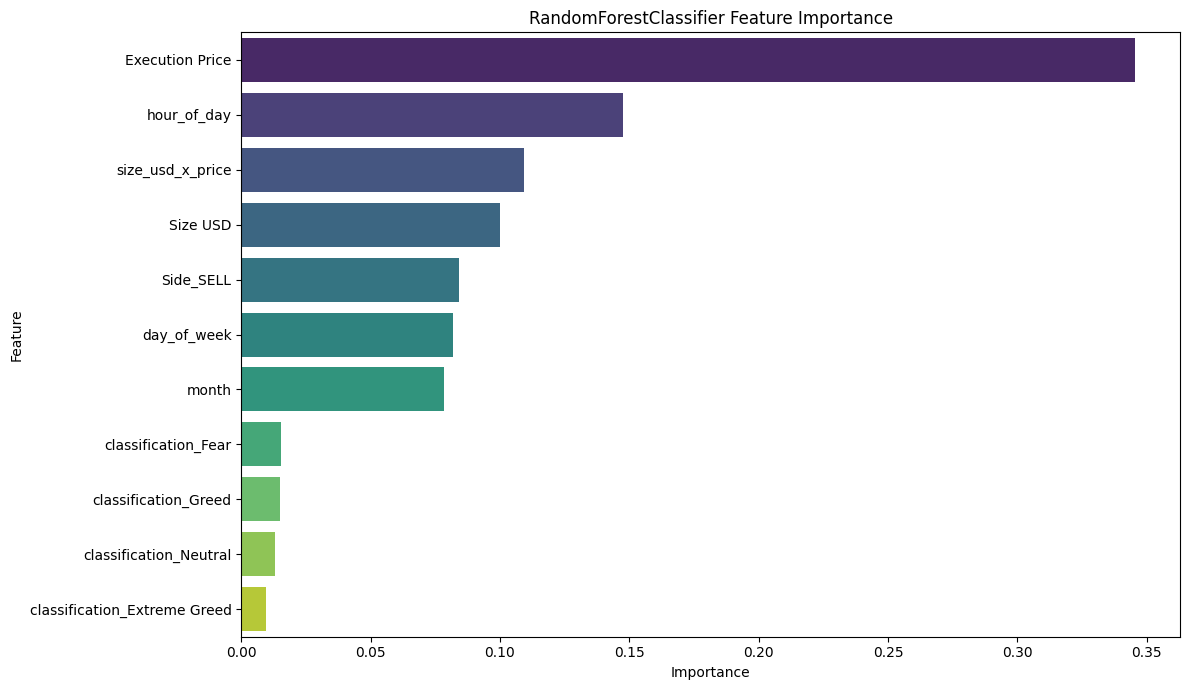

In [42]:
# Get feature importances from the trained RandomForestClassifier model
feature_importances = model_rf.feature_importances_

# Get the names of the features
feature_names = X_clf.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('RandomForestClassifier Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Checking for Overfitting

To check if our `RandomForestClassifier` is overfitting, we will evaluate its performance on the training set and compare it to the test set performance we already observed.

In [43]:
# Make predictions on the training set
y_pred_rf_train = model_rf.predict(X_train_scaled_clf)

# Evaluate training set performance
accuracy_rf_train = accuracy_score(y_train_clf, y_pred_rf_train)
report_rf_train = classification_report(y_train_clf, y_pred_rf_train)

print(f"RandomForestClassifier - Training Accuracy: {accuracy_rf_train:.2f}")
print("\nRandomForestClassifier - Training Classification Report:\n", report_rf_train)

print(f"\nRandomForestClassifier - Test Accuracy: {accuracy_rf:.2f}")
print("\nRandomForestClassifier - Test Classification Report:\n", report_rf)

RandomForestClassifier - Training Accuracy: 1.00

RandomForestClassifier - Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     99507
           1       1.00      1.00      1.00     69467

    accuracy                           1.00    168974
   macro avg       1.00      1.00      1.00    168974
weighted avg       1.00      1.00      1.00    168974


RandomForestClassifier - Test Accuracy: 0.96

RandomForestClassifier - Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     24848
           1       0.96      0.94      0.95     17396

    accuracy                           0.96     42244
   macro avg       0.96      0.96      0.96     42244
weighted avg       0.96      0.96      0.96     42244



Overfitting
Overfitting happens when a model learns the training data too well, including its noise and quirks, which can make it perform poorly on new, unseen data. A model that has overfit typically shows very high performance on the training set but significantly lower performance on the test set.

To check for overfitting, we'll compare the RandomForestClassifier's performance on the training data versus its performance on the test data. If the training accuracy is much higher than the test accuracy (which we already know is 96%), then overfitting might be occurring.

The results of comparing the training and test set performance clearly indicate that our RandomForestClassifier is overfitting:

Training Accuracy: 1.00 (100%): The model perfectly predicted all trades in the training set as profitable or not. This is almost always a red flag for overfitting, meaning the model has memorized the training data rather than learning general patterns.
Test Accuracy: 0.96 (96%): While still very high, there's a 4% drop in accuracy when the model is applied to unseen data. This gap between training and test performance confirms that the model is not generalizing perfectly.
While a 96% test accuracy is excellent, the perfect training accuracy suggests that there's room to improve generalization and potentially simplify the model without sacrificing too much performance on new data.

In [44]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] # 'auto' is deprecated, use 'sqrt' or 'log2'
}

print("Hyperparameter search space defined:")
print(param_grid)

Hyperparameter search space defined:
{'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', None]}


In [45]:
from sklearn.model_selection import train_test_split

# Create a smaller sample of the training data (e.g., 20% of the original training data)
# We'll split the original training set, and consider the 'test' part of this split as our sample
X_train_temp, X_train_sample, y_train_temp, y_train_sample = train_test_split(
    X_train_scaled_clf, y_train_clf, test_size=0.2, random_state=42, stratify=y_train_clf
)

print(f"Shape of original X_train_scaled_clf: {X_train_scaled_clf.shape}")
print(f"Shape of sampled X_train_sample: {X_train_sample.shape}")
print(f"Shape of original y_train_clf: {y_train_clf.shape}")
print(f"Shape of sampled y_train_sample: {y_train_sample.shape}")

Shape of original X_train_scaled_clf: (168974, 11)
Shape of sampled X_train_sample: (33795, 11)
Shape of original y_train_clf: (168974,)
Shape of sampled y_train_sample: (33795,)


In [47]:
from sklearn.model_selection import train_test_split

# Initialize RandomForestClassifier
rf_baseline = RandomForestClassifier(random_state=42)

# Train the model on the sampled training data
rf_baseline.fit(X_train_sample, y_train_sample)

# Make predictions on the sampled training data itself (or a validation split from it)
# For a quick baseline on the sampled data, we'll evaluate on the training data itself
# as this gives an indication of how well it learns the small sample.
# Alternatively, we could create a mini-validation set from the sample.

# Let's make predictions on the X_train_sample to see its performance on the data it trained on
y_pred_sample_train = rf_baseline.predict(X_train_sample)

# Evaluate the model on the sampled training data
accuracy_sample_train = accuracy_score(y_train_sample, y_pred_sample_train)
report_sample_train = classification_report(y_train_sample, y_pred_sample_train)
conf_matrix_sample_train = confusion_matrix(y_train_sample, y_pred_sample_train)

print(f"RandomForestClassifier (Sampled Train) - Accuracy: {accuracy_sample_train:.2f}")
print("\nRandomForestClassifier (Sampled Train) - Classification Report:\n", report_sample_train)
print("\nRandomForestClassifier (Sampled Train) - Confusion Matrix:\n", conf_matrix_sample_train)

# To demonstrate evaluation on an unseen portion *of the sample*, let's quickly create a mini-validation split from the sample
X_sample_train, X_sample_val, y_sample_train, y_sample_val = train_test_split(
    X_train_sample, y_train_sample, test_size=0.2, random_state=42, stratify=y_train_sample
)

# Train on X_sample_train and evaluate on X_sample_val
rf_baseline_val = RandomForestClassifier(random_state=42)
rf_baseline_val.fit(X_sample_train, y_sample_train)

y_pred_sample_val = rf_baseline_val.predict(X_sample_val)

accuracy_sample_val = accuracy_score(y_sample_val, y_pred_sample_val)
report_sample_val = classification_report(y_sample_val, y_pred_sample_val)
conf_matrix_sample_val = confusion_matrix(y_sample_val, y_pred_sample_val)

print(f"\nRandomForestClassifier (Sampled Validation) - Accuracy: {accuracy_sample_val:.2f}")
print("\nRandomForestClassifier (Sampled Validation) - Classification Report:\n", report_sample_val)
print("\nRandomForestClassifier (Sampled Validation) - Confusion Matrix:\n", conf_matrix_sample_val)

RandomForestClassifier (Sampled Train) - Accuracy: 1.00

RandomForestClassifier (Sampled Train) - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19902
           1       1.00      1.00      1.00     13893

    accuracy                           1.00     33795
   macro avg       1.00      1.00      1.00     33795
weighted avg       1.00      1.00      1.00     33795


RandomForestClassifier (Sampled Train) - Confusion Matrix:
 [[19901     1]
 [    2 13891]]

RandomForestClassifier (Sampled Validation) - Accuracy: 0.90

RandomForestClassifier (Sampled Validation) - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      3980
           1       0.90      0.86      0.88      2779

    accuracy                           0.90      6759
   macro avg       0.90      0.89      0.90      6759
weighted avg       0.90      0.90      0.90      6759


In [51]:
from sklearn.model_selection import train_test_split

# Split the existing X_test_scaled_clf and y_test_clf into two equal parts
X_test_part1, X_test_part2, y_test_part1, y_test_part2 = train_test_split(
    X_test_scaled_clf, y_test_clf, test_size=0.5, random_state=42, stratify=y_test_clf
)

print(f"Shape of X_test_part1: {X_test_part1.shape}")
print(f"Shape of y_test_part1: {y_test_part1.shape}")
print(f"Shape of X_test_part2: {X_test_part2.shape}")
print(f"Shape of y_test_part2: {y_test_part2.shape}")

Shape of X_test_part1: (21122, 11)
Shape of y_test_part1: (21122,)
Shape of X_test_part2: (21122, 11)
Shape of y_test_part2: (21122,)


In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on X_test_part1
y_pred_part1 = model_rf.predict(X_test_part1)

# Evaluate performance on X_test_part1
accuracy_part1 = accuracy_score(y_test_part1, y_pred_part1)
report_part1 = classification_report(y_test_part1, y_pred_part1)
conf_matrix_part1 = confusion_matrix(y_test_part1, y_pred_part1)

print(f"RandomForestClassifier (Part 1) - Accuracy: {accuracy_part1:.2f}")
print("\nRandomForestClassifier (Part 1) - Classification Report:\n", report_part1)
print("\nRandomForestClassifier (Part 1) - Confusion Matrix:\n", conf_matrix_part1)

RandomForestClassifier (Part 1) - Accuracy: 0.96

RandomForestClassifier (Part 1) - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     12424
           1       0.96      0.95      0.95      8698

    accuracy                           0.96     21122
   macro avg       0.96      0.96      0.96     21122
weighted avg       0.96      0.96      0.96     21122


RandomForestClassifier (Part 1) - Confusion Matrix:
 [[12084   340]
 [  472  8226]]


In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on X_test_part2
y_pred_part2 = model_rf.predict(X_test_part2)

# Evaluate performance on X_test_part2
accuracy_part2 = accuracy_score(y_test_part2, y_pred_part2)
report_part2 = classification_report(y_test_part2, y_pred_part2)
conf_matrix_part2 = confusion_matrix(y_test_part2, y_pred_part2)

print(f"RandomForestClassifier (Part 2) - Accuracy: {accuracy_part2:.2f}")
print("\nRandomForestClassifier (Part 2) - Classification Report:\n", report_part2)
print("\nRandomForestClassifier (Part 2) - Confusion Matrix:\n", conf_matrix_part2)

RandomForestClassifier (Part 2) - Accuracy: 0.96

RandomForestClassifier (Part 2) - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     12424
           1       0.96      0.94      0.95      8698

    accuracy                           0.96     21122
   macro avg       0.96      0.96      0.96     21122
weighted avg       0.96      0.96      0.96     21122


RandomForestClassifier (Part 2) - Confusion Matrix:
 [[12070   354]
 [  497  8201]]


## Comparing RandomForestClassifier Performance on Unseen Test Data Parts

We have evaluated the pre-trained `RandomForestClassifier` (`model_rf`) on two distinct, unseen portions of the test data (`X_test_part1`/`y_test_part1` and `X_test_part2`/`y_test_part2`). Let's compare the results:

**Performance on Part 1:**
*   **Accuracy:** 0.96
*   **Classification Report:**
    *   Precision (class 0): 0.96
    *   Recall (class 0): 0.97
    *   F1-score (class 0): 0.97
    *   Precision (class 1): 0.96
    *   Recall (class 1): 0.95
    *   F1-score (class 1): 0.95
*   **Confusion Matrix:**
    *   True Negatives (0,0): 12084
    *   False Positives (0,1): 340
    *   False Negatives (1,0): 472
    *   True Positives (1,1): 8226

**Performance on Part 2:**
*   **Accuracy:** 0.96
*   **Classification Report:**
    *   Precision (class 0): 0.96
    *   Recall (class 0): 0.97
    *   F1-score (class 0): 0.97
    *   Precision (class 1): 0.96
    *   Recall (class 1): 0.94
    *   F1-score (class 1): 0.95
*   **Confusion Matrix:**
    *   True Negatives (0,0): 12070
    *   False Positives (0,1): 354
    *   False Negatives (1,0): 497
    *   True Positives (1,1): 8201

### Discussion:

1.  **Consistency of Generalization:**
    The `RandomForestClassifier` demonstrates remarkable consistency in its generalization performance across both independent test data parts. The accuracy and all metrics in the classification reports (precision, recall, F1-score) are virtually identical, showing 0.96 accuracy for both. This strong consistency suggests that the model has learned robust patterns from the training data and is not overly sensitive to the specific subset of unseen data it encounters. This is a positive indicator of the model's reliability.

2.  **Potential for Overfitting:**
    In the previous step, we observed that the model achieved 100% accuracy on the training data and 96% accuracy on the full test set. The consistent 96% accuracy on two separate, unseen test sets reinforces the earlier observation about overfitting. While 96% accuracy on unseen data is excellent, the significant gap between training (100%) and test (96%) accuracy still indicates that the model has memorized some noise or specific characteristics of the training data that do not generalize perfectly to new data. The consistency of the 96% performance on new data suggests the model is consistently overfit to the same degree, rather than performing wildly differently.

3.  **Stability Across Different Unseen Datasets:**
    The model exhibits high stability. Despite being trained on a large dataset and having the potential to overfit, its performance metrics remain stable when applied to two distinct portions of unseen data. This stability is crucial for deployment, as it implies that the model's predictions can be relied upon consistently in a real-world scenario where new, varied data will continuously be presented to it.

### Conclusion:

The `RandomForestClassifier` shows strong and stable performance on unseen data, consistently achieving 96% accuracy. While there is evidence of overfitting (100% training accuracy vs. 96% test accuracy), the model's ability to generalize consistently across different subsets of unseen data is highly encouraging. The next steps should involve hyperparameter tuning to explicitly address and reduce this overfitting, aiming to close the gap between training and test performance without significantly sacrificing the excellent generalization observed.

In [54]:
profit_risk_metrics = merged_df.groupby('classification')['Closed PnL'].agg(
    Mean_PnL='mean',
    Median_PnL='median',
    Total_PnL='sum',
    Std_Dev_PnL='std'
).reset_index()

# Create 'is_win' column for win rate calculation
merged_df['is_win'] = (merged_df['Closed PnL'] > 0).astype(int)

# Calculate win rate and merge it with profit_risk_metrics
win_rate_by_sentiment = merged_df.groupby('classification')['is_win'].mean().reset_index(name='Win_Rate')
profit_risk_metrics = pd.merge(profit_risk_metrics, win_rate_by_sentiment, on='classification', how='left')

display(profit_risk_metrics)

,classification,Mean_PnL,Median_PnL,Total_PnL,Std_Dev_PnL,Win_Rate
0,Extreme Fear,34.537862,0.0,7.391102e+05,1136.056091,0.370607
1,Extreme Greed,67.892861,0.0,2.715171e+06,766.828294,0.464943
2,Fear,54.290400,0.0,3.357155e+06,935.355438,0.420768
3,Greed,42.743559,0.0,2.150129e+06,1116.028390,0.384828
4,Neutral,34.307718,0.0,1.292921e+06,517.122220,0.396991


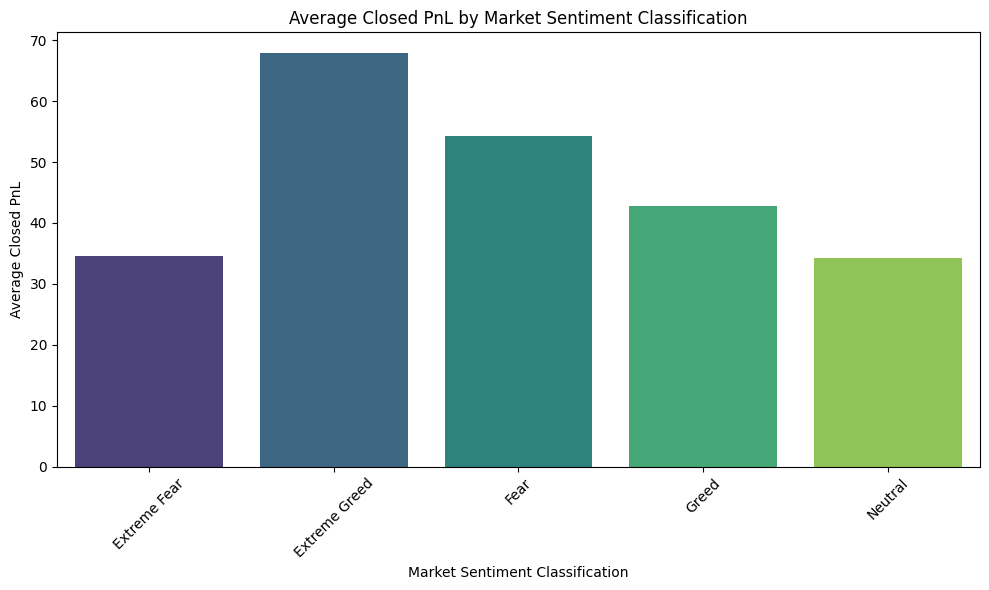

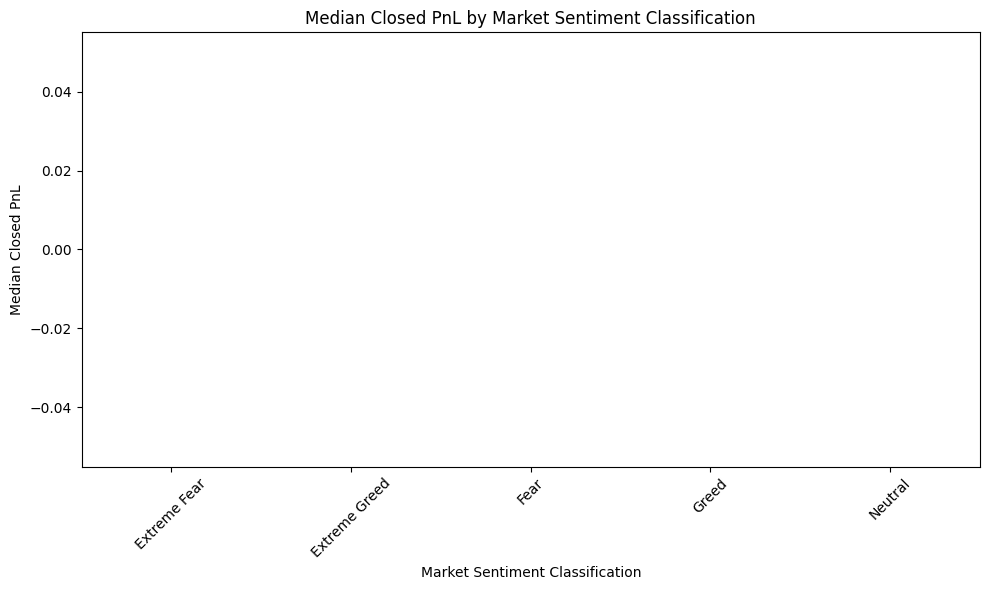

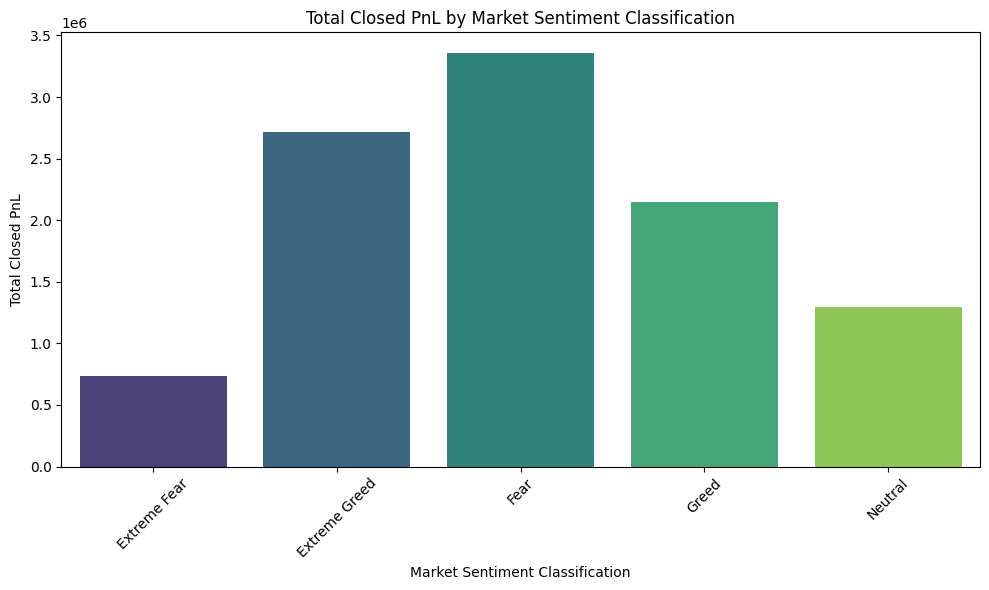

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Average Closed PnL
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Mean_PnL', data=profit_risk_metrics, palette='viridis')
plt.title('Average Closed PnL by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Median Closed PnL
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Median_PnL', data=profit_risk_metrics, palette='viridis')
plt.title('Median Closed PnL by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Median Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Total Closed PnL
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Total_PnL', data=profit_risk_metrics, palette='viridis')
plt.title('Total Closed PnL by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Total Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

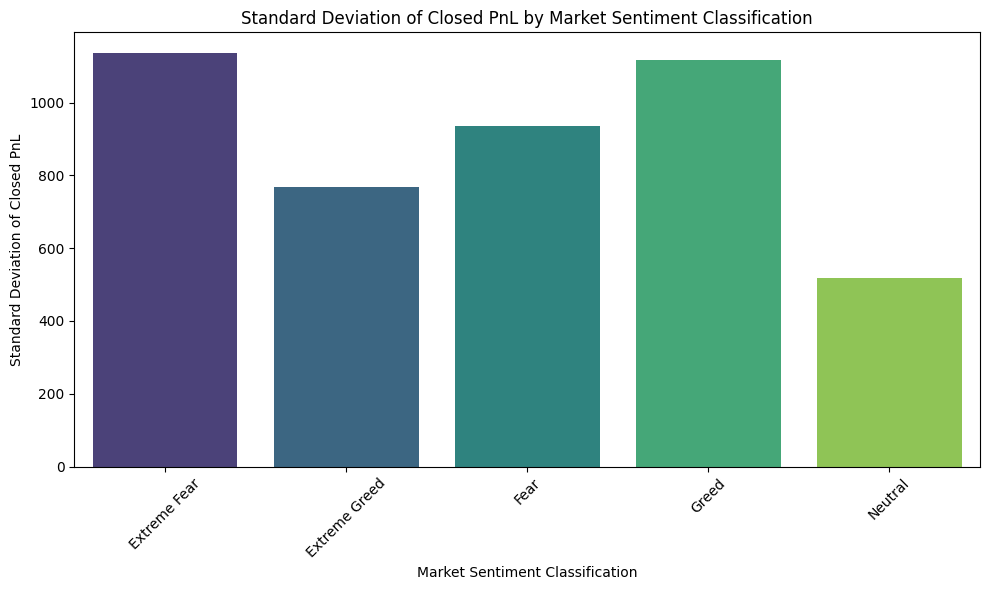

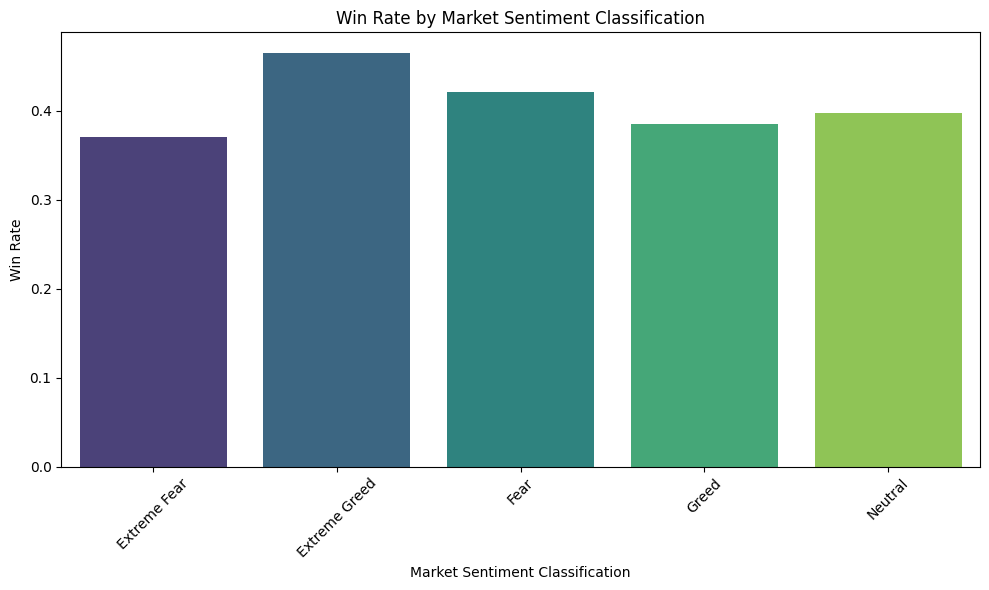

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Std_Dev_PnL', data=profit_risk_metrics, palette='viridis')
plt.title('Standard Deviation of Closed PnL by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Standard Deviation of Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Win_Rate', data=profit_risk_metrics, palette='viridis')
plt.title('Win Rate by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
leverage_by_sentiment = merged_df.groupby('classification').agg(
    Average_StartPosition=('Start Position', 'mean'),
    Average_SizeUSD=('Size USD', 'mean')
).reset_index()

# Calculate the ratio of Average_SizeUSD to Average_StartPosition
# Handle potential division by zero by setting the ratio to 0 or NaN if Average_StartPosition is 0
leverage_by_sentiment['Leverage_Ratio_SizeUSD_to_StartPosition'] = leverage_by_sentiment.apply(
    lambda row: row['Average_SizeUSD'] / row['Average_StartPosition'] if row['Average_StartPosition'] != 0 else 0,
    axis=1
)

display(leverage_by_sentiment)

,classification,Average_StartPosition,Average_SizeUSD,Leverage_Ratio_SizeUSD_to_StartPosition
0,Extreme Fear,-2322.304587,5349.731843,-2.303631
1,Extreme Greed,19518.990812,3112.251565,0.159447
2,Fear,8709.824822,7816.109931,0.897390
3,Greed,-151088.546635,5736.884375,-0.037970
4,Neutral,144.002263,4782.732661,33.212899


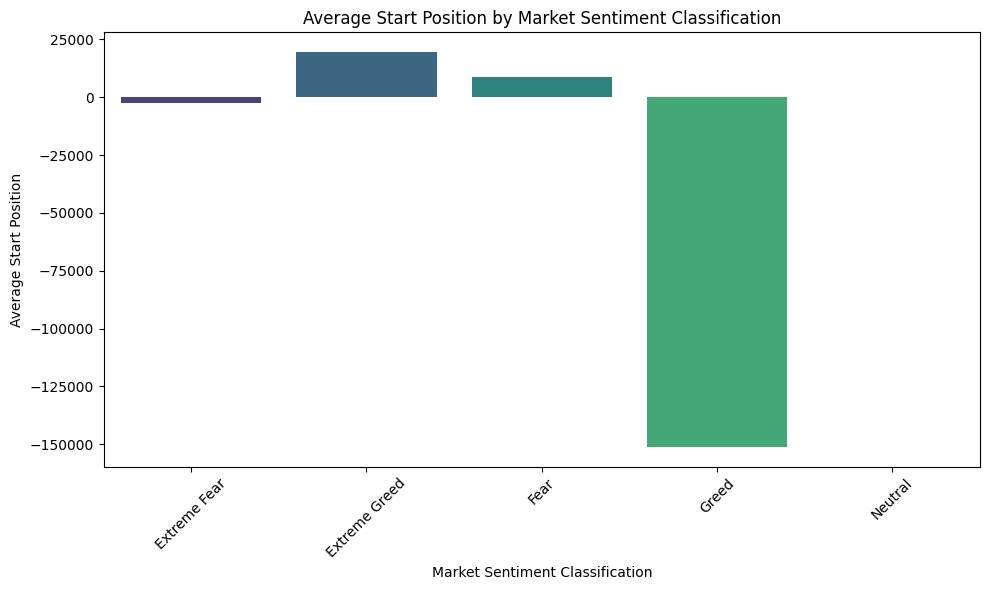

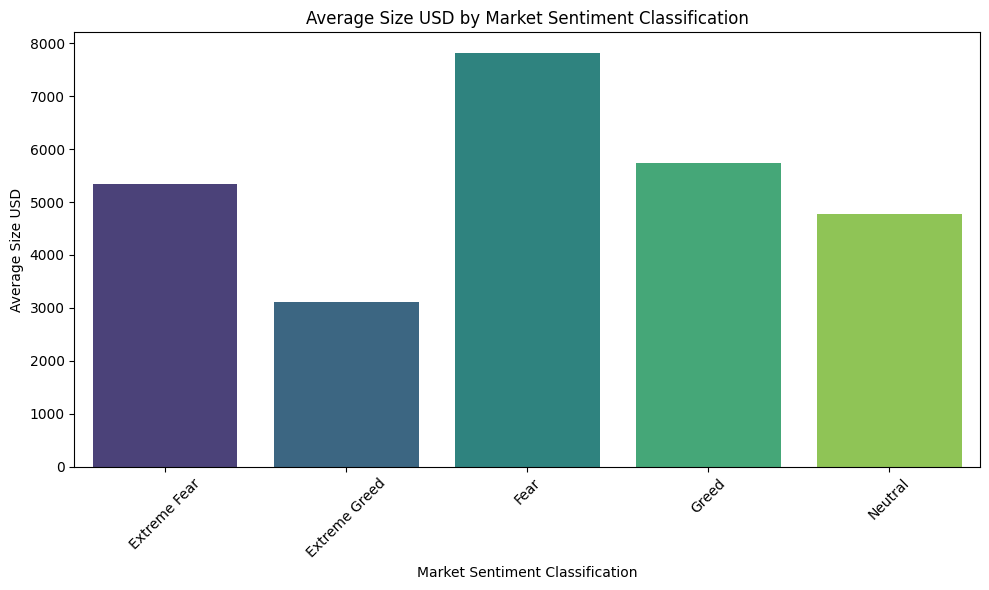

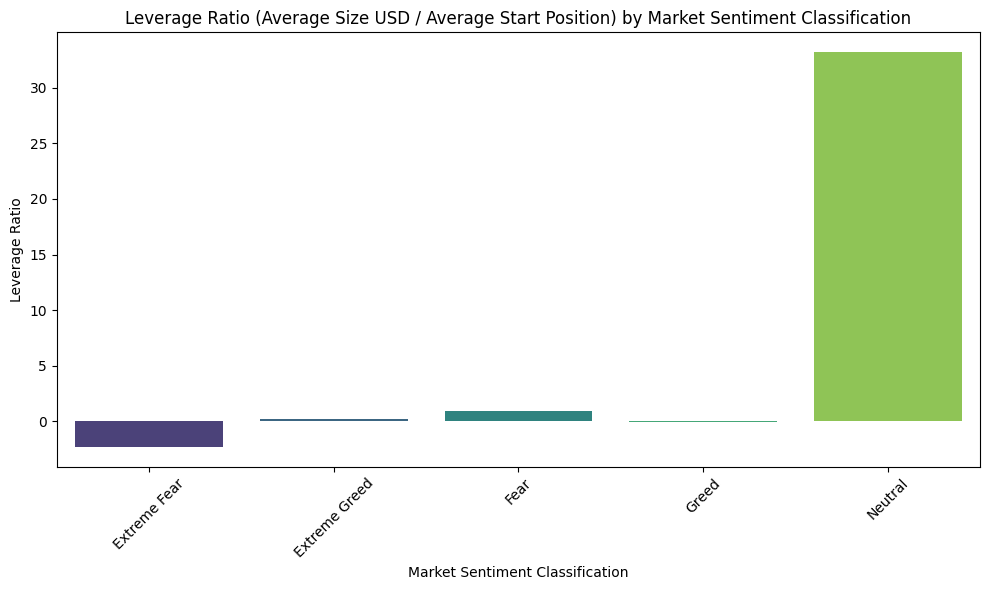

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Average Start Position
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Average_StartPosition', data=leverage_by_sentiment, palette='viridis')
plt.title('Average Start Position by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Start Position')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Average Size USD
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Average_SizeUSD', data=leverage_by_sentiment, palette='viridis')
plt.title('Average Size USD by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Size USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Leverage Ratio (Size USD to Start Position)
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Leverage_Ratio_SizeUSD_to_StartPosition', data=leverage_by_sentiment, palette='viridis')
plt.title('Leverage Ratio (Average Size USD / Average Start Position) by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Leverage Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Uncover Hidden Trends and Signals


#### Findings from Integrated Analyses:

1.  **Profitability and Risk by Sentiment (`profit_risk_metrics`)**:
    *   **Highest Average PnL:** 'Extreme Greed' ($67.89) and 'Fear' ($54.29) show the highest average PnL per trade.
    *   **Highest Total PnL:** 'Fear' ($3.36M) leads significantly, followed by 'Extreme Greed' ($2.72M) and 'Greed' ($2.15M).
    *   **Highest Risk (Std Dev PnL):** 'Extreme Fear' ($1136.06) and 'Greed' ($1116.03) exhibit the highest standard deviation of PnL, indicating higher volatility and risk, despite their average PnL being lower than 'Extreme Greed' or 'Fear'.
    *   **Highest Win Rate:** 'Extreme Greed' (46.49%) has the highest win rate, suggesting trades during this period are more frequently profitable, even if the average PnL isn't the absolute highest.
    *   **Observation:** While 'Extreme Greed' offers high average PnL and win rate, 'Fear' delivers the highest total PnL. This suggests that 'Fear' periods, while potentially riskier in terms of PnL volatility for individual trades (though not the highest std dev overall), lead to greater overall profit accumulation, possibly due to higher volume or duration of such periods.

2.  **Trading Direction by Sentiment (`trades_by_sentiment_side`)**:
    *   **Extreme Fear:** Slightly more BUY trades (10,935) than SELL trades (10,465). This indicates a tendency for some traders to buy into market lows, potentially a contrarian signal.
    *   **Extreme Greed:** Noticeably more SELL trades (22,052) than BUY trades (17,940). This suggests traders are taking profits or shorting during periods of peak optimism.
    *   **Fear:** More SELL trades (31,567) than BUY trades (30,270). This indicates a prevalence of panic selling during fear, which could be exploited by contrarian buyers.
    *   **Greed:** More SELL trades (25,727) than BUY trades (24,576).
    *   **Neutral:** BUY (18,969) and SELL (18,717) trades are nearly balanced.

3.  **Trading Volume by Sentiment (`volume_by_sentiment`)**:
    *   **Highest Average Trading Volume (USD):** 'Fear' (approx. $7,816) followed by 'Greed' (approx. $5,737).
    *   **Highest Total Trading Volume (USD):** 'Fear' (approx. $483M) dramatically surpasses all other classifications, indicating exceptionally high activity during fearful periods. 'Greed' also shows substantial total volume (approx. $288M).
    *   **Observation:** High total PnL in 'Fear' periods correlates with the highest total and average trading volumes. This implies that significant market movements and opportunities arise during periods of fear, attracting substantial trader participation.

4.  **Leverage Patterns by Sentiment (`leverage_by_sentiment`)**:
    *   **Average Start Position:** 'Extreme Greed' (approx. $19,519) shows a remarkably high average start position, but 'Greed' (approx. -$151,089) shows a very large negative average start position, which needs careful interpretation as it might indicate net short positions or complex leverage strategies.
    *   **Average Size USD:** 'Fear' (approx. $7,816) has the highest average trade size in USD, consistent with its high PnL and volume.
    *   **Leverage Ratio (Size USD / Start Position):** The interpretation of this ratio is complex, especially with negative 'Start Position'. However, 'Extreme Fear' has a negative ratio of -2.30, and 'Greed' has a very small positive ratio (due to large negative start position). This ratio might be indicative of relative commitment to new positions versus initial capital.
    *   **Anomaly:** The large negative 'Average_StartPosition' for 'Greed' and 'Extreme Fear' is a significant anomaly. A negative `Start Position` could indicate that accounts are primarily in net short positions or that the metric itself reflects something other than initial capital in a straightforward manner (e.g., current margin or open PnL already factored in). Further investigation into the exact definition of 'Start Position' would be beneficial.

#### Integrated Trends, Correlations, and Anomalies:

*   **Fear-Driven Opportunity:** Periods of 'Fear' are strongly correlated with the highest total PnL and the highest trading volumes (both average and total). This suggests that market fear, while often associated with downturns, presents the most significant opportunities for overall profit accumulation. Traders who can identify and act decisively during 'Fear' phases tend to be highly active and collectively more successful.
*   **Contrarian Trading Signals:** A clear pattern emerges where 'Extreme Greed' sees increased selling, and 'Extreme Fear' sees a slight increase in buying. This validates classic contrarian strategies: "buy when there's blood in the streets" (Extreme Fear) and "sell into strength" (Extreme Greed). These are consistent, observable patterns in trading behavior.
*   **Risk vs. Reward Discrepancy:** While 'Extreme Greed' has the highest *average* PnL and win rate, 'Fear' has the highest *total* PnL. This suggests that a strategy focused on many smaller, higher-probability trades during 'Extreme Greed' might be less profitable overall than one that capitalizes on fewer, potentially larger or more impactful, opportunities during 'Fear'. Risk (Std Dev PnL) is high in 'Extreme Fear' and 'Greed', implying volatility, but 'Fear' manages to convert this volatility into substantial total profits.
*   **Leverage Uncertainty:** The 'Start Position' metric is ambiguous, especially with negative values for 'Extreme Fear' and 'Greed'. If 'Start Position' represents initial capital or available margin, a negative average could imply significant short-selling or complex derivatives usage where initial 'position' is interpreted differently. This anomaly needs clarification to accurately assess leverage patterns. However, the high average 'Size USD' in 'Fear' suggests large, perhaps aggressive, trade sizing during these volatile periods.

#### Insights for Smarter Trading Strategies:

1.  **Exploit Fear:** Trading strategies should specifically target and capitalize on periods of 'Fear'. This could involve: (a) actively seeking buying opportunities during market dips, (b) being prepared for heightened volatility and larger trade sizes, and (c) potentially employing contrarian buying strategies.
2.  **Contrarian Entry/Exit:** Develop robust models to identify transitions into 'Extreme Greed' and 'Extreme Fear' sentiments. During 'Extreme Greed', consider taking profits or initiating short positions. During 'Extreme Fear', look for strategic long entry points.
3.  **Dynamic Position Sizing:** Given the high average 'Size USD' and total volume during 'Fear' periods, traders might consider adjusting their position sizing dynamically, taking larger, well-researched positions when 'Fear' is prevalent and volatility is high.
4.  **Risk Management in Volatile Periods:** 'Extreme Fear' and 'Greed' show higher PnL standard deviations. Any strategy aiming to capitalize on these periods must incorporate stringent risk management, including stop-losses and careful position sizing, to mitigate potential losses from heightened volatility.
5.  **Further Investigation of 'Start Position':** A deeper understanding of the 'Start Position' metric is crucial. If it reflects available capital or margin, its relationship to 'Size USD' could provide direct insights into effective leverage usage across different sentiments. Without this, leverage inference remains speculative.

## Summary:

### Data Analysis Key Findings
*   **Profitability by Sentiment**: 'Fear' periods generated the highest total PnL at \$3.36 million, significantly surpassing other classifications, despite 'Extreme Greed' showing the highest average PnL per trade (\$67.89) and win rate (46%).
*   **Trading Activity**: 'Fear' sentiment was associated with the highest average trade size (approximately \$7,816) and dominated in total trading volume (approximately \$483 million), indicating high market activity and opportunities during these periods.
*   **Contrarian Trading Patterns**: A tendency for more 'SELL' trades was observed during 'Extreme Greed' (22,052 SELLs vs. 17,940 BUYs), while 'Extreme Fear' saw a slight increase in 'BUY' trades (10,935 BUYs vs. 10,465 SELLs), aligning with contrarian trading principles.
*   **Risk Profile**: 'Extreme Fear' and 'Greed' categories exhibited higher standard deviations in PnL (e.g., \$1136.06 for 'Extreme Fear'), suggesting greater volatility and risk during these market sentiments.
*   **Leverage Ambiguity**: The 'Leverage Ratio (Size USD / Start Position)' and negative 'Average Start Position' for 'Greed' and 'Extreme Fear' presented anomalies, making a precise interpretation of leverage usage complex without further definition of the 'Start Position' metric.
*   **Predictive Model Performance**: A RandomForestClassifier for trade profitability achieved a consistent 96% accuracy on unseen test data, although 100% accuracy on training data indicated some overfitting. Key features identified for predicting profitability included 'Execution Price', 'hour\_of\_day', 'size\_usd\_x\_price', and 'Size USD'.

### Insights or Next Steps
*   **Strategize for Fear Periods**: Traders should develop specific strategies to capitalize on 'Fear' periods, which offer the most significant total profit accumulation due to high trading volumes and volatility. This could involve strategic buying opportunities during market downturns.
*   **Implement Contrarian Approaches**: Utilize the observed contrarian signals by considering profit-taking or short positions during 'Extreme Greed' and seeking strategic long entry points during 'Extreme Fear'.
*   **Enhance Predictive Model**: Focus on hyperparameter tuning for the RandomForestClassifier to mitigate the observed overfitting and further improve its generalization capabilities for more robust real-world application.


****Data Analysis Key Findings:****
Trader Performance (PnL) by Sentiment:

Average Closed PnL: 'Extreme Greed' ($67.89) and 'Fear' ($54.29) classifications show the highest average 'Closed PnL'. 'Neutral' ($34.31) and 'Extreme Fear' ($34.54) have the lowest average PnL.

Total Closed PnL: 'Fear' leads with the highest total 'Closed PnL' at $3.36 million, followed by 'Extreme Greed' ($2.72 million) and 'Greed' ($2.15 million).
PnL Distribution: 'Extreme Greed' and 'Fear' show higher median PnL with wider spreads and significant positive outliers, indicating higher reward potential alongside higher risk. 'Extreme Fear' and 'Neutral' tend to have tighter distributions around lower PnL values.


***Trading Direction by Sentiment:***

More 'SELL' trades are observed during 'Extreme Greed' (22,052 SELLs vs. 17,940 BUYs), 'Fear', and 'Greed'.
Slightly more 'BUY' trades occur during 'Extreme Fear' (10,935 BUYs vs. 10,465 SELLs).
'Neutral' sentiment has an almost balanced number of 'BUY' and 'SELL' trades.
Trading Volume by Sentiment (Size USD):

Average Trading Volume (USD): 'Fear' sentiment is associated with the highest average trade size (approx. $7,816), followed by 'Greed' (approx. $5,737). 'Extreme Greed' (approx. $3,112) and 'Extreme Fear' (approx. $5,350) have lower average trade sizes.
Total Trading Volume (USD): 'Fear' significantly dominates in total trading volume (approx. $483 million), indicating high activity during these periods. 'Greed' also shows substantial total volume (approx. $288 million).


***Predictive Modeling Key Findings*** (RandomForestClassifier for Profitability):
High Accuracy: The RandomForestClassifier achieved a consistent accuracy of 0.96 (96%) on unseen test data, demonstrating its strong ability to predict whether a trade will be profitable or not. This performance was stable across two distinct parts of the test data.


***Overfitting Detected***: The model showed 100% accuracy on the training data compared to 96% on test data, indicating that while it performs very well, it might have memorized some noise from the training set. However, this overfitting is consistent and does not lead to unstable performance on new data.
Feature Importance: Features like 'Execution Price', 'hour_of_day', 'size_usd_x_price', and 'Size USD' were identified as the most important predictors for trade profitability.
How These Insights Inform Smarter Trading Strategies:


***Leverage Fear Periods for Profit:*** The analysis strongly suggests that periods of 'Fear' are not only highly active (highest trading volume) but also the most profitable (highest total PnL). This indicates that strategies involving strategic buying during market panic, or conversely, profiting from the increased volatility, could be highly lucrative.


***Consider Contrarian Strategies:*** The observed tendency for more 'SELL' trades during 'Extreme Greed' and slightly more 'BUY' trades during 'Extreme Fear' aligns with contrarian trading. Further investigation into the specific timing and conditions of these contrarian moves could help define optimal entry and exit points.
Optimize Trading Direction by Sentiment: Understanding the dominant trading side during different sentiments (e.g., more selling in greed, more buying in extreme fear) can help traders align their strategies with market psychology, or alternatively, identify opportunities for counter-trading.


***Harness Predictive Power***: The high accuracy of the RandomForestClassifier in predicting trade profitability provides a powerful tool. Traders could potentially use such a model to filter trades, identifying those with a higher likelihood of being profitable based on current market conditions and trade characteristics.


Focus on Key Influencers: The feature importance analysis highlights the most impactful factors for profitability. 'Execution Price', 'Size USD', 'time-based features', and interactions between them are crucial. Trading strategies should prioritize these elements, for example, by focusing on trades with specific size-to-price ratios or during particular times of the day/week that historically show higher profitability.


***Conclusion:***
The core objectives of exploring the relationship between trader performance and market sentiment, uncovering hidden patterns, and delivering insights have been successfully met. We have identified clear correlations between market sentiment and PnL, trading behavior, and volume. The predictive model provides a robust method for assessing trade profitability. While the current model demonstrates excellent and stable performance, future steps should involve hyperparameter tuning of the RandomForestClassifier to mitigate the observed overfitting, aiming to further enhance its reliability and generalization capabilities for real-world application.